## Python statistics essential training - 04_02_confidenceintervals

Standard package imports

In [4]:
import math
import io

In [5]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [6]:
import scipy.stats
import scipy.optimize
import scipy.spatial

Goal: Statistical inference for an upcoming local election. You poll 1000 voters on their intended vote.

In [14]:
poll_df = pd.read_csv('poll.csv')
# import file

In [15]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [16]:
poll_df.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [17]:
#Count votes
# 'vote' is the only col in the df
poll_df.vote.value_counts()

vote
Brown    511
Green    489
Name: count, dtype: int64

In [18]:
#normalize the vote counts to get fraction of votes per candidate
poll_df.vote.value_counts(normalize=True)

vote
Brown    0.511
Green    0.489
Name: proportion, dtype: float64

The proportion depends on the specific people you were able to poll/sample. THe exact results could differe with a different sample of 1000 voters.
This is SAMPLING VARIABILITY

We want to understand the range of samples we may get for the same population. Done by simulating on a computer (Hacker stats)

In [20]:
#Build a func to simulate samples
#func will take the actual fraction of votes for Mayor Brown and the number of people polled
# use random function to create a random sample, then turn into bools (T/F) by using comparison operator and the actual proportion from the real sample as the break value
# np.random.rand(n) gives n samples of values between 0 & 1. The actual proportion for mayor Brown from the real sample is 0.511

np.random.rand(5) < 0.511 #True for Brown, False for Green

array([False, False, False,  True, False])

In [24]:
# Change T/F to Brown/Green for easier comprehension
np.where(np.random.rand(5) < 0.511, 'Brown', 'Green')

array(['Brown', 'Green', 'Brown', 'Brown', 'Green'], dtype='<U5')

In [27]:
# make a function out of it (good for reusability)
#arguments: fraction voting for Brown (brown_fract), number of samples (n)
def sample(brown_fract, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown_fract, 'Brown', 'Green')})

In [39]:
s1 = sample(0.51)
s1.vote.value_counts(normalize=True)
#notice that usually the returned proportion doesn't always match the entered proportion, sometimes Brown gets less votes

vote
Green    0.506
Brown    0.494
Name: proportion, dtype: float64

In [41]:
# repeat simulated sampling many times and collect results in a df (simulated 500 times)
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(500)])

In [42]:
dist.head()

vote,Green,Brown
proportion,0.513,0.487
proportion,0.473,0.527
proportion,0.489,0.511
proportion,0.497,0.503
proportion,0.483,0.517


<Axes: >

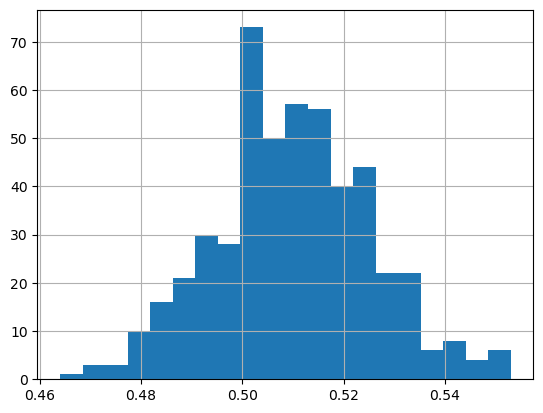

In [44]:
#view df in a histogram
dist.Brown.hist(bins=20)

## Now to make this more precise & identify a likely range of two fractions of votes
### Confidence intervals
##### xx% CI contains the true value of a poplation parameter xx% of the time
##### ex. 95% CI means that 95% of the time, the range includes the true value
###### Usually simpler to simulate in computer rather than figure out stats math

In [45]:
# Make a func for simulating sampling distribution for the fraction of Brown votes
def samplingdist (brown_frac, n=1000):
    return pd.DataFrame([sample(brown_frac,n).vote.value_counts(normalize=True) for i in range(500)])

##### For the 95% CI: this range will lie between the 2.5% quantile & the 97.5% quantile (2.5% on either side of the entire range)
##### Look for the True fraction for which a measured value of 0.511 lies at the 2.5% quantile and the true fraction for which a measured value of 0.511 lies at the 97.5% quantile
##### Those two fractions are the edges of the 95% CI

In [47]:
# Func that extracts the 2.5% & 97.5% quantiles
def quantiles (brown, n=1000):
    dist = samplingdist(brown, n) #call samplingdist func made above to generate df
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975) #call quantile method on the dist df

Try a few fractions to see when we get approx 0.511 for both quantiles

In [48]:
quantiles(0.50)

(0.471475, 0.532525)

In [51]:
quantiles(0.48)
#Got approx 0.511 for the 97.5% quantile

(0.449475, 0.511525)

In [52]:
quantiles(0.54)
# Got approx 0.511 for the 2.5% quantile

(0.508475, 0.573)

#### The 95% CI is 0.48 to 0.54
##### For an observed sample with proportion of 0.51 and n=1000
### Can be written as:
#### Estimate: = 0.51 +- 0.03 (at 95% confidence)

# Make this even more accurate with more samples

In [53]:
dist = samplingdist(0.50, 10000)

<Axes: >

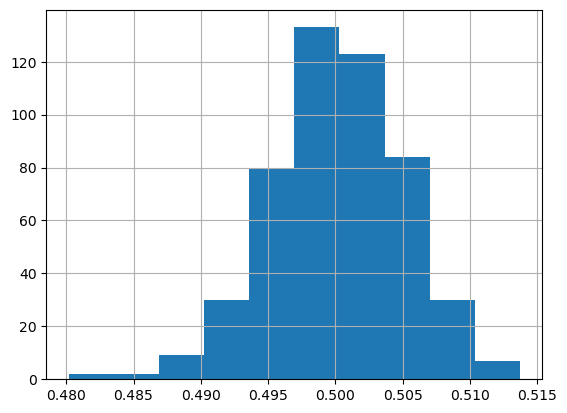

In [55]:
dist.Brown.hist()

Can see the margin of error is closer to 1% (x-axis)

# Compare to actual results

In [56]:
largepoll = pd.read_csv('poll-larger.csv')

In [57]:
largepoll.vote.value_counts(normalize=True)

vote
Green    0.5181
Brown    0.4819
Name: proportion, dtype: float64